In [1]:
# import Pandas
import pandas as pd

# import os
import os

# import numpy
import numpy as np

# import pyplot
import matplotlib.pyplot as plt

In [2]:

final_df = pd.read_csv(os.path.join("../stats/final_combine_player_data.csv"))
final_df.head()

,Year,Name,Age,FG%,FT%,PTS,AST,STL,BLK,TOV,...,gp,net_rating,Salary Cap,Injury_DTD,Injury_DNP,Injury_Out_Indef,Injury_Out_Season,Injury_Returned,Injury_Other,Salary%
0,2010,Aaron Brooks,25.0,0.432000,0.8220,1604.000000,434.000000,69.0,14.000000,232.0,...,59.0,-6.5,57700000,0.0,0.0,0.0,0.0,0.0,0.0,3.495133
1,2010,Aaron Gray,25.0,0.483333,0.6190,69.333333,14.666667,6.0,7.333333,12.0,...,41.0,2.2,57700000,0.0,0.0,0.0,0.0,0.0,0.0,1.783085
2,2010,Acie Law,25.0,0.472500,0.7935,56.500000,13.000000,5.5,0.500000,8.5,...,51.0,-8.2,57700000,0.0,0.0,0.0,0.0,0.0,0.0,1.097492
3,2010,Al Harrington,29.0,0.435000,0.7570,1276.000000,110.000000,62.0,26.000000,132.0,...,73.0,3.7,57700000,0.0,0.0,0.0,0.0,0.0,0.0,9.991334
4,2010,Al Horford,23.0,0.551000,0.7890,1148.000000,189.000000,59.0,91.000000,122.0,...,77.0,0.2,57700000,0.0,0.0,0.0,0.0,0.0,0.0,9.436494


[]

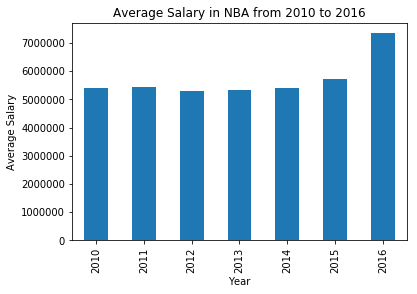

In [3]:
#DATA EXPLORATION
#Get mean of average NBA Salary from each year to show that it doesn't make sense to look at absolute salaries
sal=final_df.groupby('Year')['Salary'].mean()
var=sal.plot.bar(x='Year', y='Salary')
var.set_ylabel("Average Salary")
var.set_title("Average Salary in NBA from 2010 to 2016")
var.plot()

In [4]:
#to normalize salaries, make them as a percentage of the salary cap in that year
# 

Text(0.5,1,'Total Points from NBA players from 2010 to 2016')

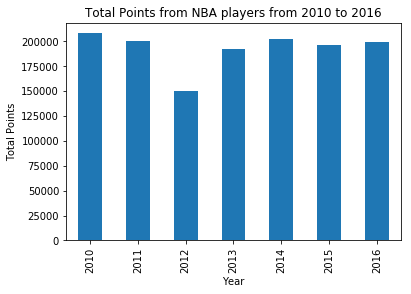

In [4]:
#More data exploration, looking at how an advanced metric, total points in each year
pts=final_df.groupby('Year')['PTS'].sum()
graph=pts.plot.bar()
graph.set_ylabel('Total Points')
graph.set_title('Total Points from NBA players from 2010 to 2016')
# graph.set_ylim(45,100)

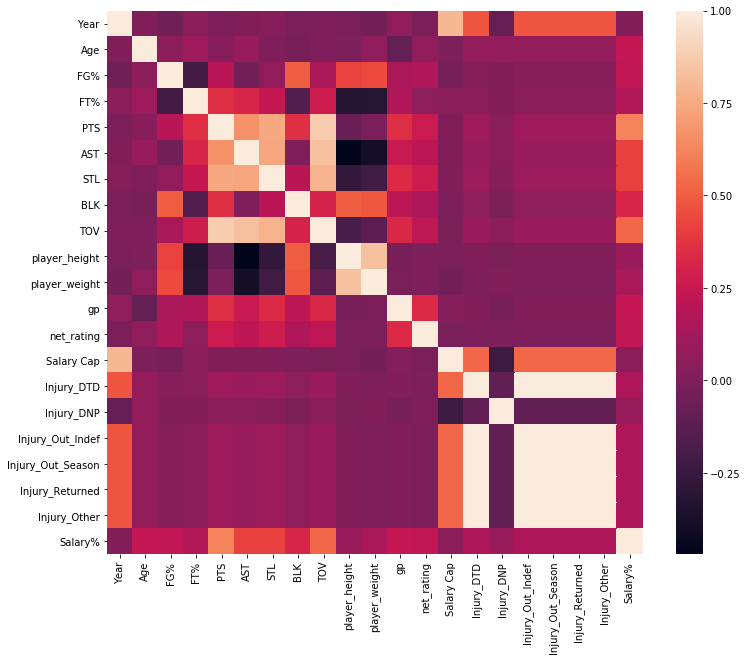

In [5]:
#remove salary in heatmap, store in separate variable
salary=final_df['Salary']
stats=final_df.drop('Salary', axis=1)


#setting up heatmap for correlations between all statistics
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(12,10))
corr = stats.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values, ax=ax)

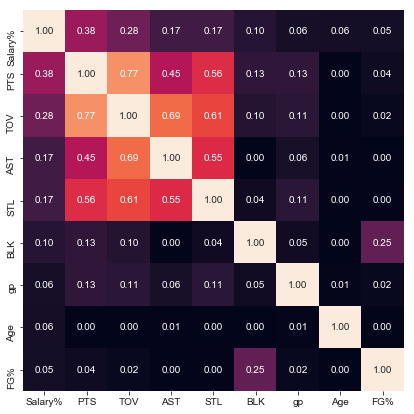

In [6]:
#function that creates heatmaps for the 8 variables that are most strongly correlated with Salary% for each of the data subsets
def heatMap(df, k):
    corrmat = df.corr(method='pearson', min_periods=1)
    r_square = corrmat ** 2
    ## Top K-1 correlated variables
    cols = r_square.nlargest(k, 'Salary%')['Salary%'].index
    cm = df[cols].corr()
    cm_square = cm ** 2
    f, ax = plt.subplots(figsize=(7, 7))
    sns.set(font_scale=1.25)
    hm = sns.heatmap(cm_square, cbar=False, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
    plt.show()
heatMap(stats, 9)

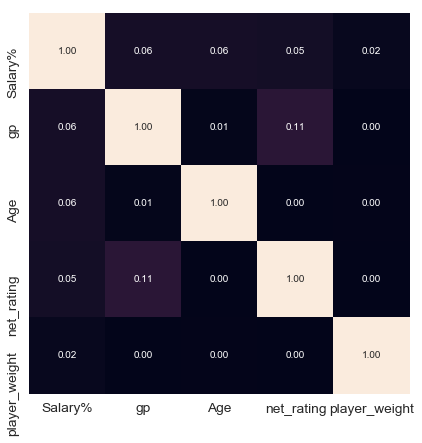

In [7]:
#splitting stats into 2-3 categories for later on, when looking at which group of stats is the best predictor of salary
physical=['Salary%', 'Age', 'player_height', 'player_weight','gp','net_rating']
performance=['Salary%','FG%', 'FT%', 'PTS', 'STL', 'BLK', 'AST', 'TOV']
injuries=['Salary%','Injury_DTD','Injury_DNP','Injury_Out_Indef','Injury_Out_Season','Injury_Returned','Injury_Other']

physical_stats=stats[physical]
performance_stats=stats[performance]
injury_stats=stats[injuries]


#basic only has 4
heatMap(physical_stats, 5)

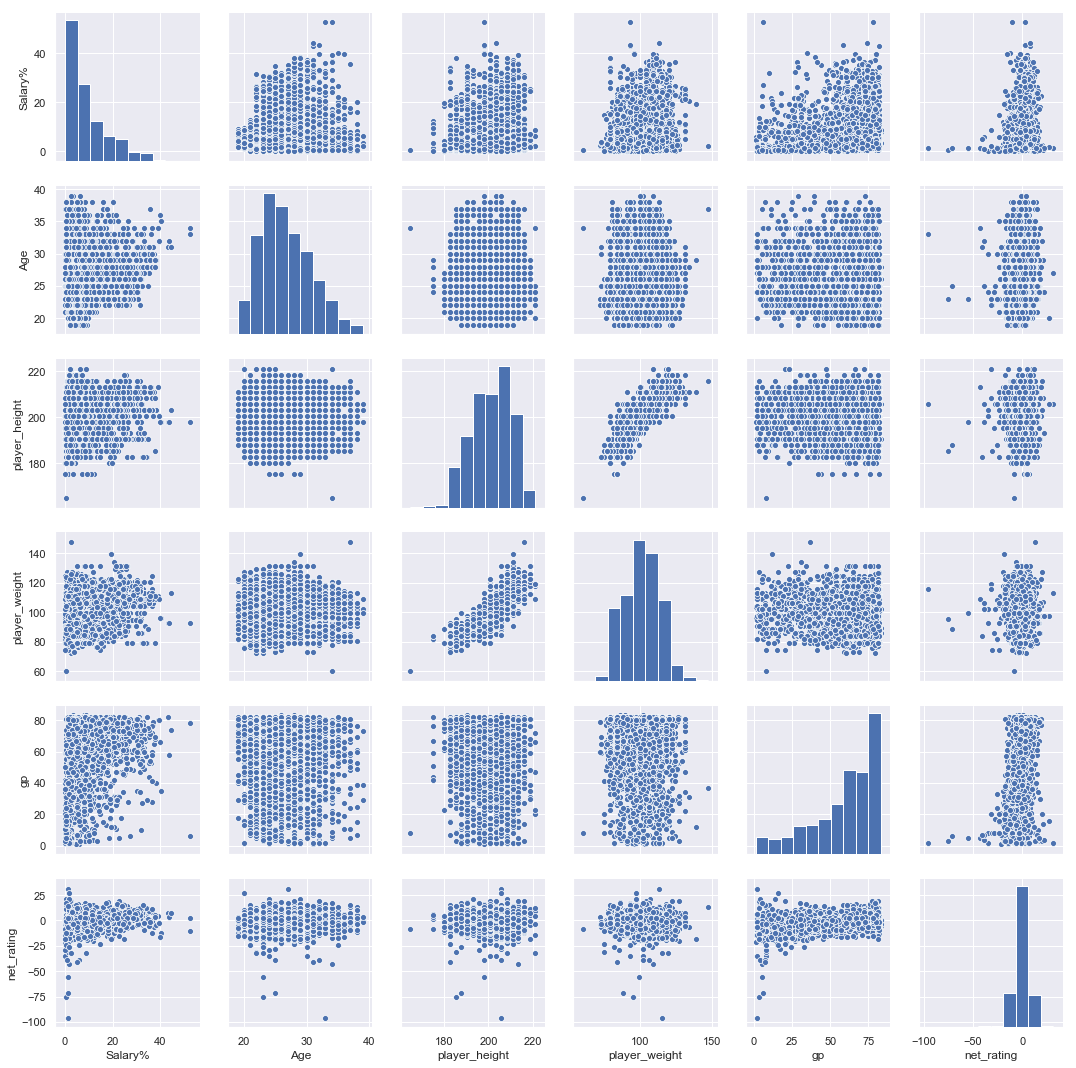

In [8]:

#creating scatter plots to further look at the relationships between Salary% and physical characteristics
sns.set()
sns.pairplot(physical_stats, height=2.5)
plt.show()

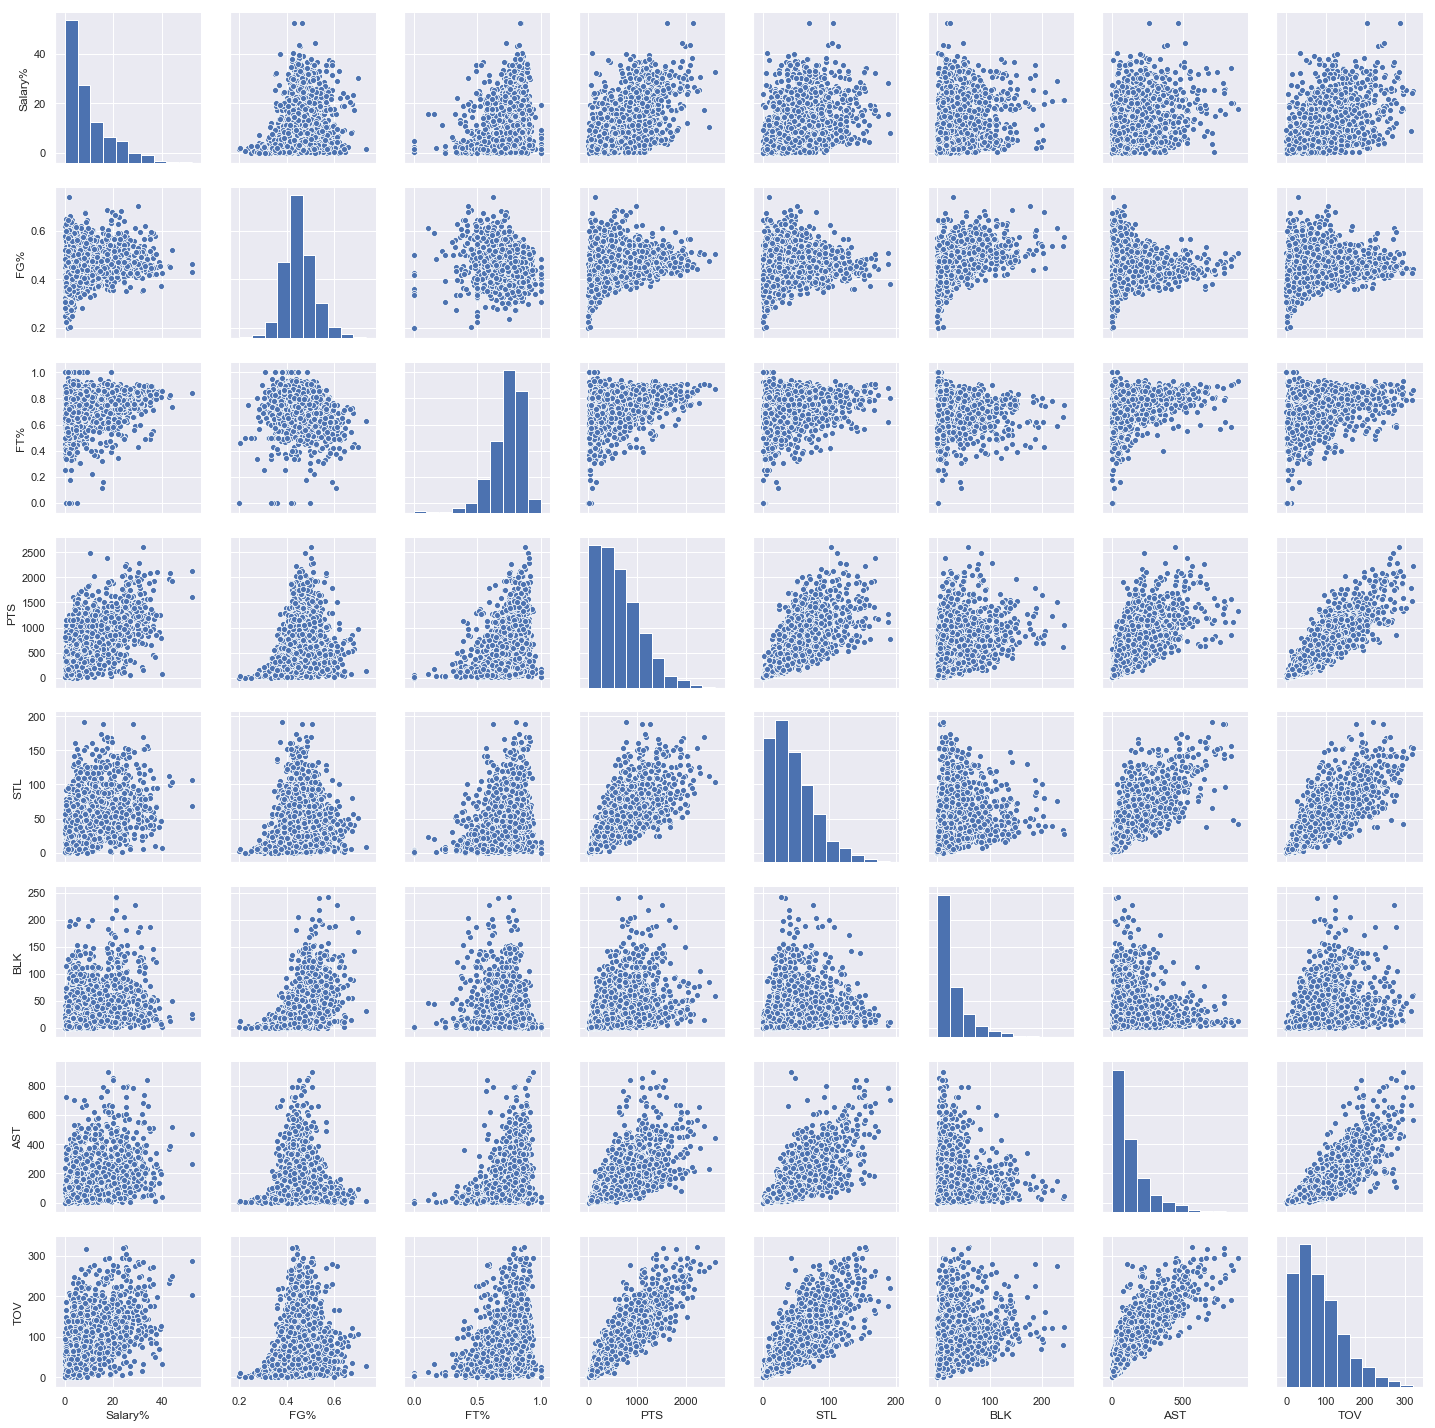

In [9]:
#creating scatter plots to further look at the relationships between Salary% and performances
sns.set()
sns.pairplot(performance_stats, height=2.5)
plt.show()

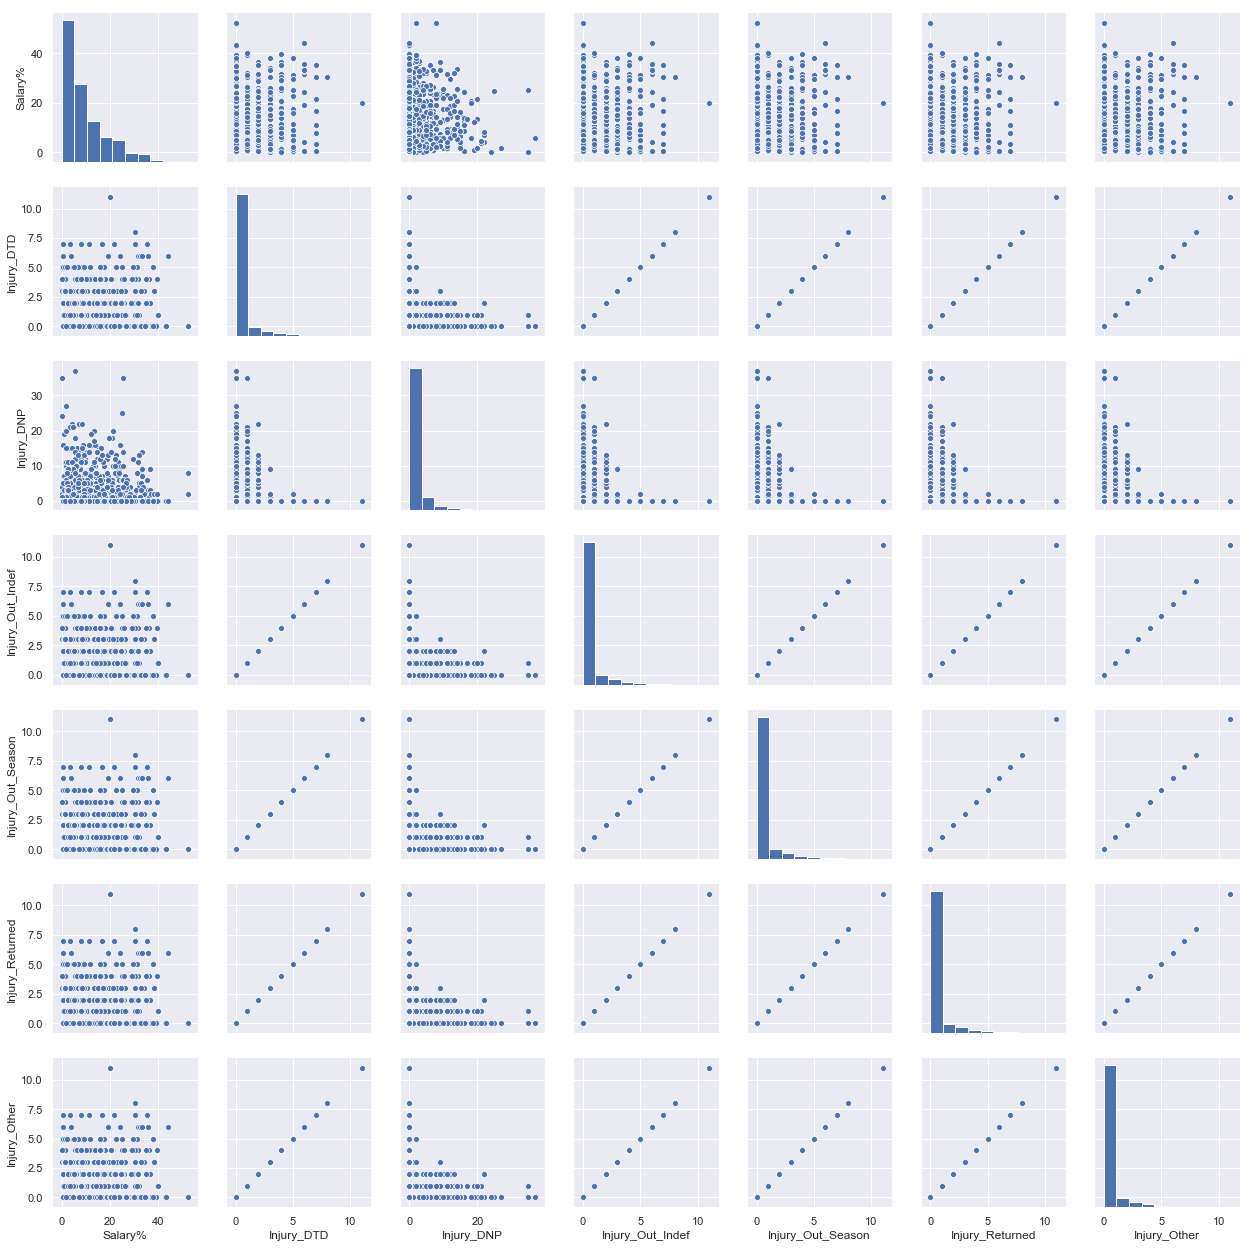

In [10]:
#creating scatter plots to further look at the relationships between Salary% and injuries
sns.set()
sns.pairplot(injury_stats, height=2.5)
plt.show()

In [12]:
#see if any variables are multicollinear, if so they can be removed
x = performance_stats[['FG%', 'FT%', 'PTS', 'STL', 'BLK', 'AST', 'TOV']]
phyDF=physical_stats[['Age', 'player_height', 'player_weight', 'gp','net_rating']]
z=injury_stats[['Injury_DTD','Injury_DNP','Injury_Out_Indef','Injury_Out_Season','Injury_Returned','Injury_Other']]


from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif["features"] = x.columns
vif.round(1)
    
#lower VIF factor values means less multicollinearity

,VIF Factor,features
0,25.3,FG%
1,24.2,FT%
2,15.4,PTS
3,8.7,STL
4,3.2,BLK
5,9.4,AST
6,27.6,TOV


In [18]:
performanceDF = performance_stats[['FG%', 'FT%', 'PTS', 'STL', 'BLK', 'AST', 'TOV']]

In [19]:

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(phyDF.values, i) for i in range(phyDF.shape[1])]
vif["features"] = phyDF.columns
vif.round(1)

# player_height and player_weight are a little bit high

,VIF Factor,features
0,39.7,Age
1,216.1,player_height
2,143.9,player_weight
3,9.8,gp
4,1.1,net_rating


In [20]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(z.values, i) for i in range(z.shape[1])]
vif["features"] = z.columns
vif.round(1)

#injury data probably not suitable for the fitting

/Users/Guobao/anaconda3/lib/python3.7/site-packages/statsmodels/stats/outliers_influence.py:181: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,VIF Factor,features
0,inf,Injury_DTD
1,1.0,Injury_DNP
2,inf,Injury_Out_Indef
3,inf,Injury_Out_Season
4,inf,Injury_Returned
5,inf,Injury_Other


In [24]:
injuryDF= injury_stats[['Injury_DNP']]

Root Mean Squared Error is : 8.041001754669276
R sq is : 0.15724761693936695


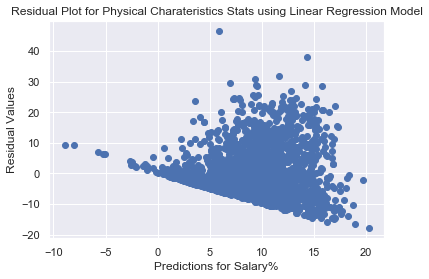

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics
from sklearn.metrics import mean_squared_error
import numpy as np

from sklearn.linear_model import LinearRegression

#target array
y=stats[['Salary%']]

#PHYSICAL STATS
linreg = LinearRegression()

#Linear regression on all three subsets of data to see which scores the best
x_train, x_test, y_train, y_test=train_test_split(phyDF, y, test_size=0.2, random_state=123)
linreg.fit(x_train, y_train)
predictions=linreg.predict(x_test)

#cross validate model
predict = cross_val_predict(linreg, phyDF, y, cv=6)

#get RMSE and R^2 values
rmse = np.sqrt(mean_squared_error(predict, y))
score = metrics.r2_score(y, predict)
print ('Root Mean Squared Error is :', rmse)
print ('R sq is :', score)

#create residual plot
residuals = y - predict
plt.scatter(predict, residuals)
plt.xlabel('Predictions for Salary%')
plt.ylabel('Residual Values')
plt.title('Residual Plot for Physical Charateristics Stats using Linear Regression Model')
plt.show()

Root Mean Squared Error is : 6.753288845387489
R sq is : 0.405556850927423


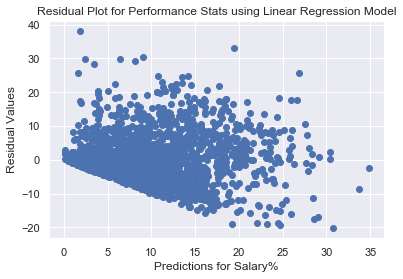

In [38]:
#PERFORMANCE STATS
x_train, x_test, y_train, y_test=train_test_split(performanceDF, y, test_size=0.2, random_state=123)
linreg.fit(x_train, y_train)
predictions=linreg.predict(x_test)

#cross validate model
predict = cross_val_predict(linreg, performanceDF, y, cv=6)

#get RMSE and R^2 values
rmse = np.sqrt(mean_squared_error(predict, y))
score = metrics.r2_score(y, predict)
print ('Root Mean Squared Error is :', rmse)
print ('R sq is :', score)

#create residual plot
residuals = y - predict
plt.scatter(predict, residuals)
plt.xlabel('Predictions for Salary%')
plt.ylabel('Residual Values')
plt.title('Residual Plot for Performance Stats using Linear Regression Model')
plt.show()

Root Mean Squared Error is : 8.73862913563902
R sq is : 0.00467183777995861


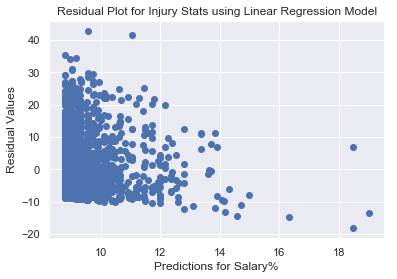

In [40]:
#INJURY STATS
x_train, x_test, y_train, y_test=train_test_split(injuryDF, y, test_size=0.2, random_state=123)
linreg.fit(x_train, y_train)
predictions=linreg.predict(x_test)

#cross validate model
predict = cross_val_predict(linreg, injuryDF, y, cv=6)

#get RMSE and R^2 values
rmse = np.sqrt(mean_squared_error(predict, y))
score = metrics.r2_score(y, predict)
print ('Root Mean Squared Error is :', rmse)
print ('R sq is :', score)

#create residual plot
residuals = y - predict
plt.scatter(predict, residuals)
plt.xlabel('Predictions for Salary%')
plt.ylabel('Residual Values')
plt.title('Residual Plot for Injury Stats using Linear Regression Model')
plt.show()

In [29]:
#Performance Stats had the highest R squared and lowest RMSE values, so that's the subsection that I will be using to look at overvalued and undervalued players
#positive residual=overvalued, negative=undervalued
stats['Predicted Salary%']=predict
stats['Residuals']=residuals
stats['Resid %']=(stats['Residuals']/stats['Salary%']*100)

In [30]:
copy=stats
copy=copy[['Year', 'Name', 'Age','Salary%', 'Predicted Salary%', 'Residuals']]
copy=copy.sort_values('Residuals')
#get top25 most undervalued players
top25=copy[:25]
top25

,Year,Name,Age,Salary%,Predicted Salary%,Residuals
1438,2014,Nate Robinson,29.0,0.183500,18.461271,-18.277771
1306,2014,Ekpe Udoh,26.0,1.559745,16.310358,-14.750613
1017,2013,Greg Smith,22.0,0.026885,14.573830,-14.546946
1346,2014,Jason Smith,27.0,5.586326,18.998999,-13.412673
1315,2014,Gal Mekel,25.0,1.080410,14.159446,-13.079035
957,2013,Caron Butler,32.0,0.421213,12.813122,-12.391909
1526,2014,Xavier Henry,22.0,1.843931,13.837723,-11.993793
1327,2014,Greg Smith,23.0,1.615847,13.083989,-11.468142
1371,2014,Jordan Farmar,27.0,3.539597,14.697174,-11.157577
770,2012,Josh Howard,31.0,1.333430,11.712680,-10.379250


In [31]:
ageMean=top25['Age'].mean()
print ('Average age is:',ageMean)

percentMean=top25['Salary%'].mean()
print ('Average Salary% is:',percentMean)

residMean=top25['Residuals'].mean()
print ('Average absolute value Residual is:',-1*residMean, '%')

Average age is: 26.36
Average Salary% is: 1.324282957458472
Average absolute value Residual is: 11.137451618225157 %


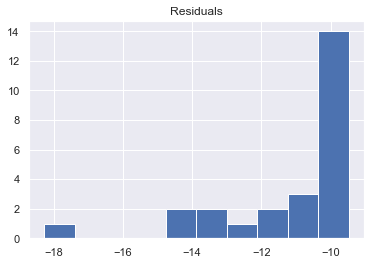

In [32]:
hist=top25.hist(column='Residuals')

In [33]:

#get most overvalued players by residuals
bottom25=copy[-25:]
bottom25

,Year,Name,Age,Salary%,Predicted Salary%,Residuals
1580,2015,Chris Bosh,30.0,35.190248,9.051189,26.139059
1894,2016,Carmelo Anthony,31.0,35.084829,8.795721,26.289108
696,2012,Dirk Nowitzki,33.0,36.019447,9.730242,26.289206
1614,2015,Dwight Howard,29.0,35.454474,9.051189,26.403285
956,2013,Carmelo Anthony,28.0,36.849550,9.951972,26.897579
1929,2016,Dirk Nowitzki,37.0,35.714286,8.795721,26.918565
553,2011,Rashard Lewis,31.0,36.414842,9.355669,27.059173
594,2011,Tim Duncan,34.0,36.463061,9.355669,27.107391
1574,2015,Carmelo Anthony,30.0,36.272100,9.051189,27.220911
480,2011,Kevin Garnett,34.0,36.605065,9.355669,27.249396


In [34]:
ageMean=bottom25['Age'].mean()
print ('Average age is:',ageMean)

percentMean=bottom25['Salary%'].mean()
print ('Average Salary% is:',percentMean)

residMean=bottom25['Residuals'].mean()
print ('Average Residual is:',residMean, '%')

Average age is: 31.68
Average Salary% is: 39.15672988734937
Average Residual is: 29.847389660674978 %


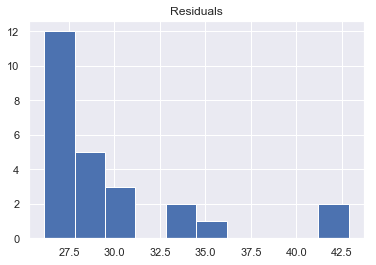

In [35]:
graph=bottom25.hist(column='Residuals')

In [36]:
#trying a different method, because raw residual values tends to discriminate against superstars who are being paid a lot of money

copy2=stats
copy2=copy2[['Year', 'Name', 'Age','Salary%', 'Predicted Salary%', 'Resid %']]
copy2=copy2.sort_values('Resid %')
top25B=copy2[:25]
top25B

,Year,Name,Age,Salary%,Predicted Salary%,Resid %
1017,2013,Greg Smith,22.0,0.026885,14.573830,-54108.485007
97,2010,Earl Barron,28.0,0.020241,8.956167,-44147.865885
1877,2016,Axel Toupane,23.0,0.022050,8.795721,-39789.890061
1939,2016,Elijah Millsap,28.0,0.032956,8.795721,-26589.516368
200,2010,Mario West,25.0,0.034841,8.956167,-25606.154587
496,2011,Larry Owens,28.0,0.038397,9.168383,-23778.029124
227,2010,Othyus Jeffers,24.0,0.062163,8.956167,-14307.572925
1035,2013,Jared Cunningham,21.0,0.079946,9.291706,-11522.442091
1588,2015,Cory Jefferson,24.0,0.078822,9.051189,-11383.096366
1466,2014,Ricky Ledo,21.0,0.081849,9.051189,-10958.439287


In [37]:
bottom25B=copy2[-25:]
bottom25B
## Seems like James is overvalued based on the model, which is not accurate 

,Year,Name,Age,Salary%,Predicted Salary%,Resid %
1405,2014,LeBron James,29.0,35.181922,9.051028,74.273639
1268,2014,Chris Bosh,29.0,35.181922,9.051028,74.273639
1580,2015,Chris Bosh,30.0,35.190248,9.051189,74.279269
553,2011,Rashard Lewis,31.0,36.414842,9.355669,74.308088
594,2011,Tim Duncan,34.0,36.463061,9.355669,74.342062
480,2011,Kevin Garnett,34.0,36.605065,9.355669,74.441599
1614,2015,Dwight Howard,29.0,35.454474,9.051189,74.470954
1908,2016,Damian Lillard,25.0,34.754893,8.795721,74.692137
1894,2016,Carmelo Anthony,31.0,35.084829,8.795721,74.930130
1261,2014,Carmelo Anthony,29.0,38.273319,9.588756,74.946630
